## import

In [ ]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline



from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### load data


In [3]:
df_train=pd.read_csv('datasets/clean/processedtrain.csv')
df_test=pd.read_csv('datasets/clean/processedtest.csv')
data=df_train.copy()

In [4]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.085106,1.82,0.769403,1,1,3.00,3.0,1,0,2.71,0,2.00,0.814,1,0.753684,Obesity_Type_III
1,0,0.382979,1.84,0.442239,1,1,2.33,2.0,1,0,2.56,0,1.33,0.481,1,0.212105,Overweight_Level_II
2,0,0.212766,1.76,0.584552,1,1,1.54,3.0,1,0,2.00,0,1.63,0.631,1,0.753684,Obesity_Type_II
3,1,0.255319,1.62,0.534925,1,1,3.00,3.0,1,0,2.69,0,0.00,0.425,1,0.753684,Obesity_Type_III
4,0,0.382979,1.78,0.613433,1,1,2.76,3.0,1,0,2.16,0,0.43,0.716,1,0.212105,Obesity_Type_II


### prep


In [5]:
df_train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df_train['NObeyesdad']=encoder.fit_transform(df_train['NObeyesdad'])
df_train['NObeyesdad'].value_counts()

df_test['NObeyesdad']=encoder.fit_transform(df_test['NObeyesdad'])
df_test.head(11)



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.475,1.71,0.371471,1,1,2.88,3.0,1,0,3.00,0,2.00,0.832,0,0.255924,6
1,0,0.075,1.75,0.497972,1,1,2.00,3.0,2,0,2.00,0,2.00,0.000,0,0.701422,2
2,0,0.075,1.85,0.208213,1,0,2.00,3.0,1,0,3.00,0,2.00,1.000,1,0.009479,1
3,0,0.375,1.78,0.668847,1,1,2.50,3.0,1,0,2.04,0,0.84,0.490,1,0.255924,3
4,0,0.225,1.80,0.670999,1,1,2.20,3.0,1,0,2.51,0,1.66,0.128,1,0.701422,3
5,1,0.225,1.51,0.197616,1,0,2.00,1.0,1,0,1.85,0,0.55,0.236,0,0.701422,6
6,1,0.150,1.60,0.219803,1,1,2.11,3.0,1,0,2.75,0,1.91,0.000,1,0.701422,5
7,0,0.025,1.75,0.249607,1,0,2.00,3.0,1,0,1.00,0,3.00,2.000,1,0.023697,1
8,0,0.225,1.60,0.506582,1,1,3.00,1.0,1,0,1.27,0,0.07,1.552,0,0.701422,3
9,1,0.250,1.63,0.542926,1,1,3.00,3.0,1,0,1.48,0,0.10,0.663,1,0.701422,4


### logistic

### Create model

In [ ]:
log_col=['Weight','family_history_with_overweight','Age','Height','FAVC','CALC','FAF','TUE','Gender','MTRANS','NCP','FCVC']
X_train=df_train[log_col]
y_train=df_train.NObeyesdad

#class_weights = {0:0.7, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1}
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced', 
    classes=nb.unique(y_train), 
    y=y_train
)
# Best practice pipeline
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
       penalty='elasticnet',
        l1_ratio=0.55,       
        multi_class='multinomial',  # Uses softmax
        solver='saga',           # Optimizer for multinomial
        max_iter=200,
        random_state=42,
        class_weight=dict(zip(nb.unique(y_train), class_weights))
))
model.fit(X_train, y_train)


c:\Users\Administrator\anaconda3\envs\MYENV\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight={np.int64(0): np.float64(1.0944700460829493),
                                                  np.int64(1): np.float64(1.0644257703081232),
                                                  np.int64(2): np.float64(0.8429458740017747),
                                                  np.int64(3): np.float64(1.0479867622724766),
                                                  np.int64(4): np.float64(0.916988416988417),
                                                  np.int64(5): np.float64(1.0281385281385282),
                                                  np.int64(6): np.float64(1.0602678571428572)},
                                    l1_ratio=0.55, max_iter=200,
                                    multi_class='multinomial',
                                    penalty='elasticnet', random_state=42,
                                    solver='saga'))])


## Model Type
Algorithm: Multinomial Logistic Regression with ElasticNet regularization

Framework: scikit-learn

Implementation: Pipeline with StandardScaler and LogisticRegression

## Key Parameters:
penalty='elasticnet': Uses both L1 and L2 regularization

l1_ratio=0.55: Balance between L1 and L2 regularization (55% L1, 45% L2)

multi_class='multinomial': Uses softmax for multi-class classification

solver='saga': Optimization algorithm suitable for multinomial loss with elasticnet

max_iter=200: Maximum optimization iterations

random_state=42: Random seed for reproducibility

class_weight='balanced': Automatically adjusts weights inversely proportional to class frequencies

### test accuracy


In [9]:
X_test=df_test[log_col]
y_test=df_test.NObeyesdad
y_pred=model.predict(X_test)


In [10]:
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
train_acc= accuracy_score(y_train,y_train_pred)
print(f"train Accuracy: {train_acc:.2f}")
print(f"test Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

train Accuracy: 0.92
test Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.81      0.90        32
           2       0.77      0.69      0.73        29
           3       0.79      1.00      0.88        38
           4       1.00      1.00      1.00        28
           5       0.81      0.85      0.83        26
           6       0.83      0.74      0.78        34

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



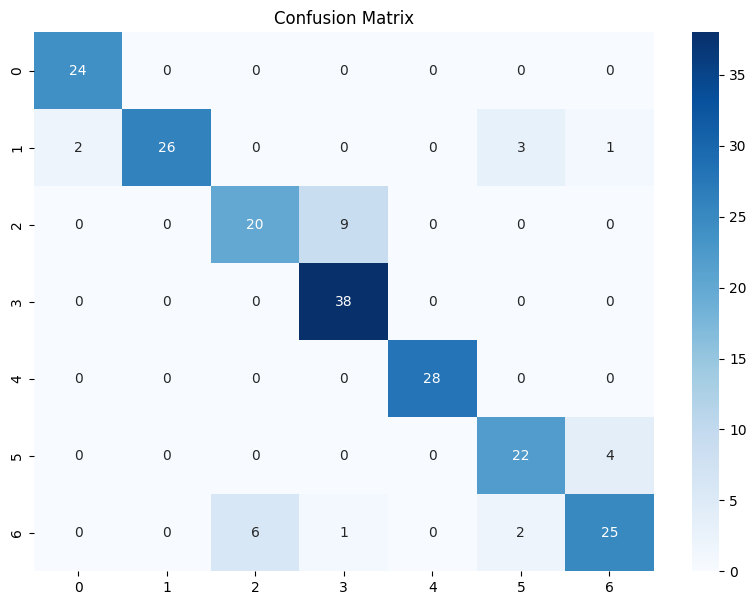

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()